全国の雲量を可視化したい

In [116]:
import matplotlib.pyplot as plt
from matplotlib.animation import ArtistAnimation as aa
import numpy as np
import xarray as xr
import cartopy.crs as crs
import datetime as dt
import japanize_matplotlib

In [144]:
class PlotCloudOnJapan:
    def __init__(self,date:dt.datetime):
        self.date = date

    def plot(self,hour:int,isgif=False):
        # データを読み込む
        ds = xr.open_dataset(f"../data/{self.date.year}/{str(self.date.month).zfill(2)}/{self.date.year}_{str(self.date.month).zfill(2)}{str(self.date.day).zfill(2)}.nc")

        # もしも時間指定があった時はそっちを優先
        if hour:
            self.date = self.date.replace(hour = hour)

        # dateから1時間後のdatetimeオブジェクトを生成
        end_time = self.date + dt.timedelta(hours=1)

        # データからcloudを取り出す
        cloud_array = ds.sel(time=slice(self.date, end_time))['ncld'].values[0]

        # 欠損値をマスクする
        masked_data = np.ma.masked_where(np.isnan(cloud_array), cloud_array)

        # 地図を作成する
        fig, ax = plt.subplots(facecolor="darkblue",subplot_kw={'projection': crs.PlateCarree()})
        ax.set_extent([120, 150, 20, 50], crs.PlateCarree())
        ax.coastlines(resolution='10m')

        # カラーマップを設定する
        cmap = plt.cm.get_cmap('Blues')

        # プロットする
        img = ax.imshow(masked_data, cmap=cmap, origin='upper', extent=[120, 150, 20, 50], transform=crs.PlateCarree())
        cbar = plt.colorbar(img, cmap=cmap, orientation='horizontal', shrink=0.8)
        cbar.set_label('Cloud Cover')

        # プロットを保存する
        # plt.savefig('cloud_cover.png', dpi=300, bbox_inches='tight')
 
        ax.set_title(f"{self.date.year}/{self.date.month}/{self.date.day} {self.date.hour}時の雲")
        if isgif:
            return fig
        else:
            # plt.show()
            pass

    def plot_gif(self,interval=100):
        frames = []
        for i in range(1,13):
            frames.append(self.plot(i,isgif=True))
        
        fig = plt.figure(figsize=(10,10))
        
        animation = aa(fig,frames,interval=interval)
        # plt.show()

In [133]:
a = 1

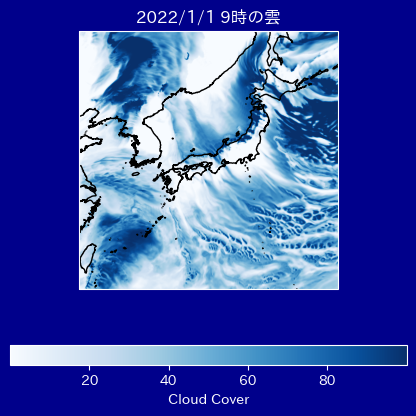

In [142]:
date = dt.datetime(2022,1,1,a)
pcoj = PlotCloudOnJapan(date)
pcoj.plot(9)

12


c:\Users\astro\anaconda3\envs\FCpy310\lib\site-packages\matplotlib\animation.py:887: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you have outputted the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


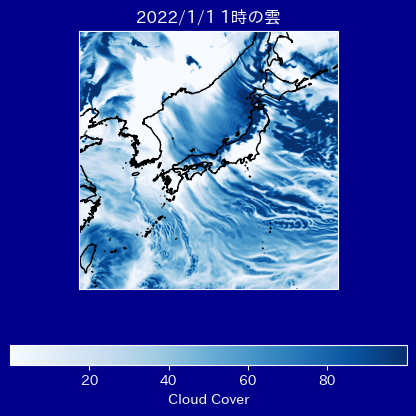

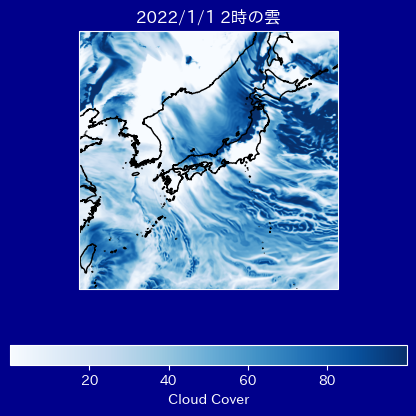

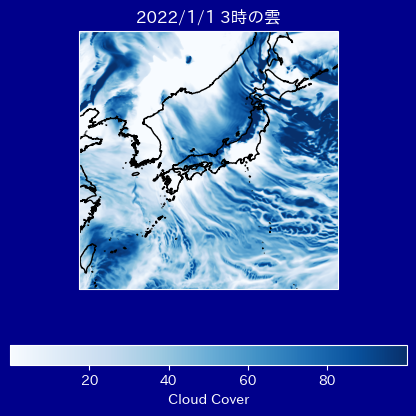

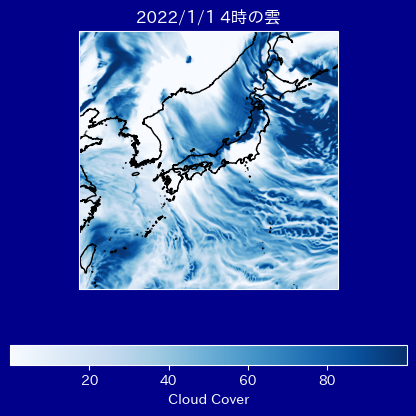

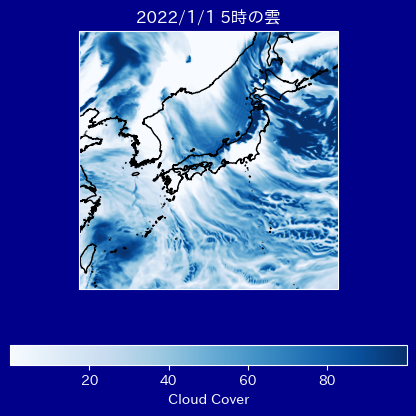

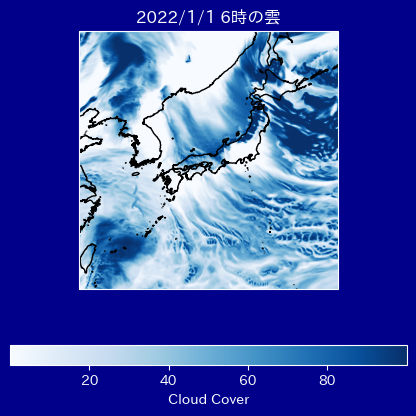

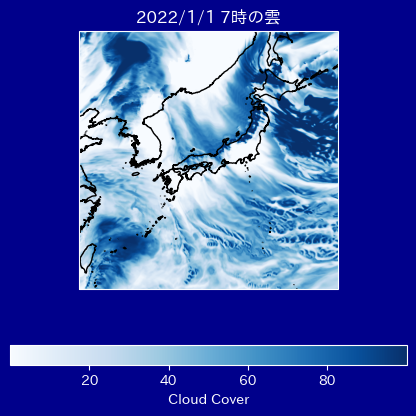

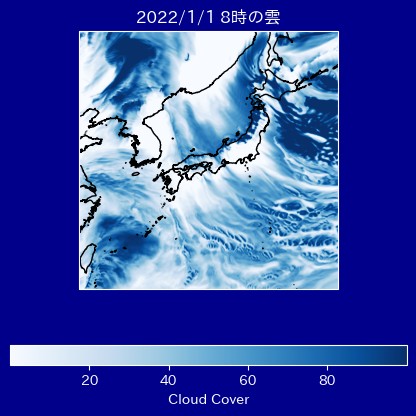

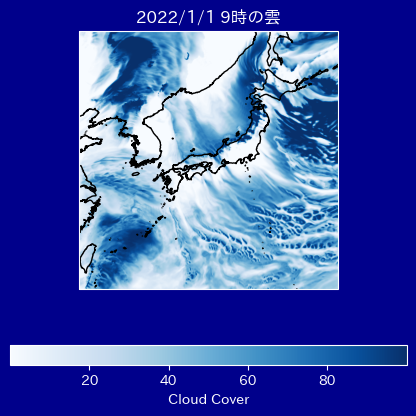

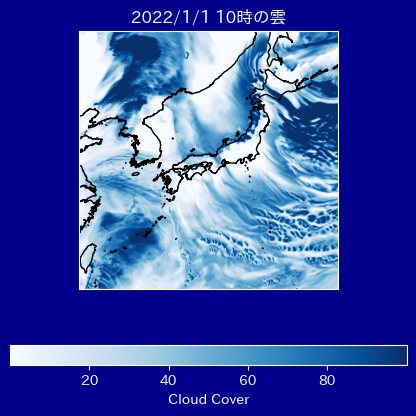

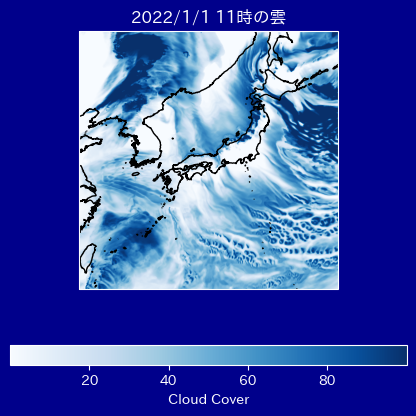

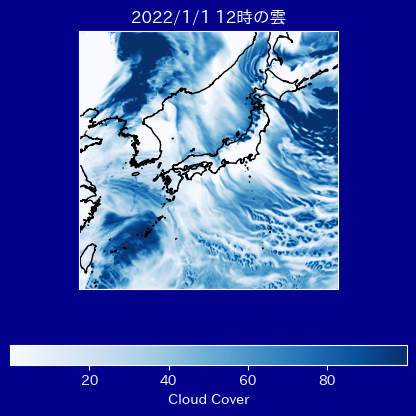

<Figure size 1000x1000 with 0 Axes>

In [145]:
date = dt.datetime(2022,1,1,a)
pcoj = PlotCloudOnJapan(date)
pcoj.plot_gif()